#  Import required packages

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler

# Load dataset

In [3]:
(train_images, _), (test_images, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 50s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 8s 2us/step


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 393ms/step - loss: 0.3788 - val_loss: 0.2832
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 88s 373ms/step - loss: 0.2781 - val_loss: 0.2753
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - loss: 0.2723 - val_loss: 0.2711
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 428ms/step - loss: 0.2687 - val_loss: 0.2681
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 443ms/step - loss: 0.2649 - val_loss: 0.2651
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 466ms/step - loss: 0.2624 - val_loss: 0.2627
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 418ms/step - loss: 0.2601 - val_loss: 0.2611
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 109s 465ms/step - loss: 0.2590 - val_loss: 0.2602
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 437ms/step - loss: 0.2581 - val_loss: 0.2589
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 457ms/step - loss: 0.2560 - val_loss: 0.2581
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 471ms/step - loss: 0.2563 - val_loss: 0.2574
Epoch 12/2

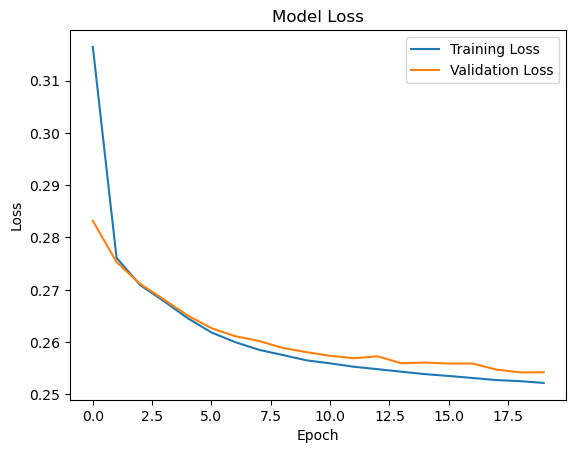

In [5]:
# Normalize the pixel values (0 to 255) to the range [0, 1]
scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images.reshape(-1, 28*28))
test_images = scaler.transform(test_images.reshape(-1, 28*28))

# Reshape images into 28x28 format with 1 channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the autoencoder model
input_img = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder
autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(train_images, train_images, epochs=20, batch_size=256, validation_data=(test_images, test_images))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [7]:
# Visualize some of the reconstructed images
decoded_imgs = autoencoder.predict(test_images)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
